In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/Users/avinashmagar/Documents/Code/class/python/Datasets/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


In [3]:
df.shape

(9582, 11)

In [4]:
df.size

105402

In [5]:
df.columns

Index(['Brand', 'model', 'Year', 'Age', 'kmDriven', 'Transmission', 'Owner',
       'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [7]:
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [8]:
df['kmDriven'].value_counts()

kmDriven
65,000 km     198
80,000 km     182
75,000 km     167
70,000 km     154
90,000 km     148
             ... 
99,860 km       1
125,888 km      1
28,120 km       1
80,444 km       1
83,228 km       1
Name: count, Length: 1910, dtype: int64

In [9]:
df['kmDriven'] = df['kmDriven'].str.replace(',', '')

In [10]:
df['kmDriven'] = df['kmDriven'].str.replace('km', '')

In [11]:
df['kmDriven'].value_counts()

kmDriven
65000      198
80000      182
75000      167
70000      154
90000      148
          ... 
99860        1
125888       1
28120        1
80444        1
83228        1
Name: count, Length: 1910, dtype: int64

In [12]:
df['kmDriven'] = df['kmDriven'].str.replace('.', '')

In [13]:
df['kmDriven'].value_counts()

kmDriven
65000      198
80000      186
75000      168
70000      156
90000      149
          ... 
76269        1
30800        1
37710        1
895660       1
83228        1
Name: count, Length: 1853, dtype: int64

In [14]:
df['kmDriven'].isnull().sum()


47

In [15]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)

IQR=Q3-Q1

#Define outlier boundaries

ll=Q1-1.5*IQR
ul=Q3+1.5*IQR

#Remove Outlier 

df_no_outlier=df[(df['Age']>=ll)& (df['Age']<=ul)]
print(df_no_outlier)

              Brand      model  Year  Age  kmDriven Transmission   Owner  \
1            Toyota     Innova  2009   15  1900000        Manual  second   
2        Volkswagen  VentoTest  2010   14    77246        Manual   first   
3     Maruti Suzuki      Swift  2017    7    83500        Manual  second   
4     Maruti Suzuki     Baleno  2019    5    45000     Automatic   first   
5               BMW         X3  2014   10    83000     Automatic   first   
...             ...        ...   ...  ...       ...          ...     ...   
9577          Skoda    Octavia  2014   10   105904     Automatic  second   
9578  Maruti Suzuki   Alto-800  2020    4    55000        Manual   first   
9579  Maruti Suzuki       Ritz  2013   11    92000        Manual   first   
9580        Hyundai      Verna  2019    5    72000     Automatic   first   
9581        Hyundai    New i20  2021    3    83228        Manual  second   

        FuelType PostedDate  \
1         Diesel     Jul-24   
2         Diesel     Nov-

In [16]:
df['Age'].max()

38

In [17]:
df_no_outlier['Age'].max()

17

<Axes: xlabel='Age'>

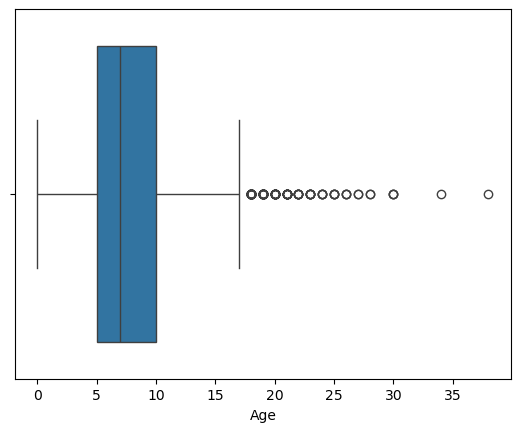

In [18]:
sns.boxplot(data=df,x='Age')

<Axes: xlabel='Age'>

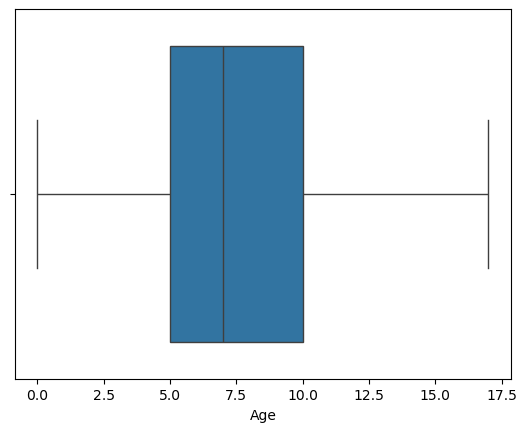

In [19]:
sns.boxplot(data=df_no_outlier,x='Age')

In [20]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Age'] = df['Age'].clip(lower=ll, upper=ul)

ul, ll

(17.5, -2.5)

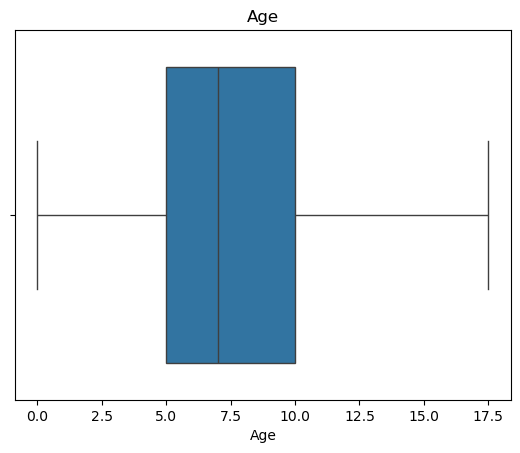

In [21]:
age = 'Age'
for i in df.select_dtypes(include=np.number).columns:
    if i == age:  
        plt.title(i)
        sns.boxplot(x=df[i])  
        plt.show()



<Axes: ylabel='Year'>

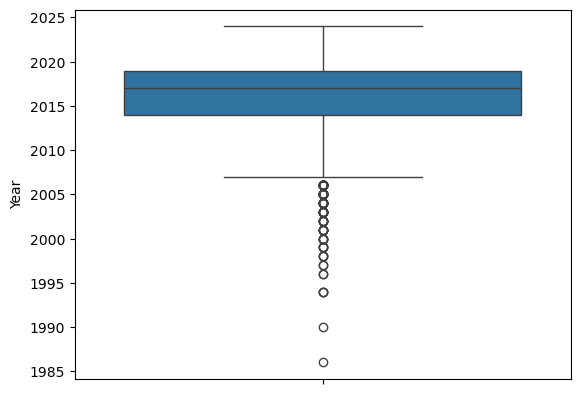

In [22]:
sns.boxplot(df['Year'])

In [23]:
q1 = df['Year'].quantile(0.25)
q3 = df['Year'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Year'] = df['Year'].clip(lower=ll, upper=ul)

ul, ll

(2026.5, 2006.5)

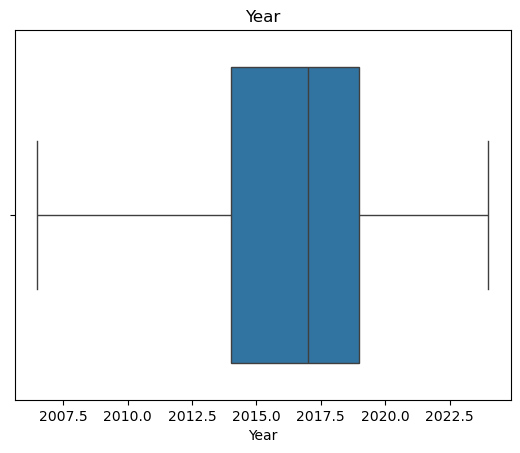

In [24]:
year = 'Year'
for i in df.select_dtypes(include=np.number).columns:
    if i == year:  
        plt.title(i)
        sns.boxplot(x=df[i])  
        plt.show()


In [25]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [26]:
df.shape

(53940, 10)

In [27]:
df.size

539400

In [28]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: ylabel='carat'>

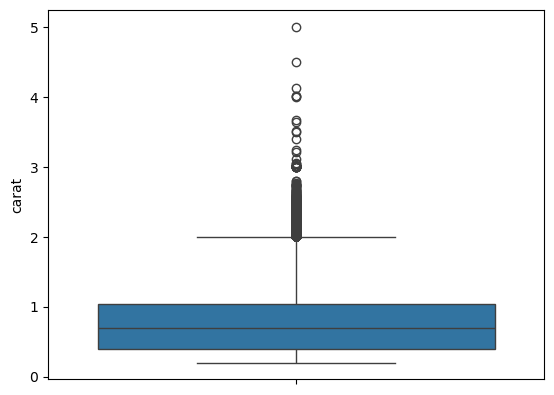

In [29]:
sns.boxplot(df['carat'])

In [30]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['carat'] = df['carat'].clip(lower=ll, upper=ul)

ul, ll

(2.0, -0.5599999999999999)

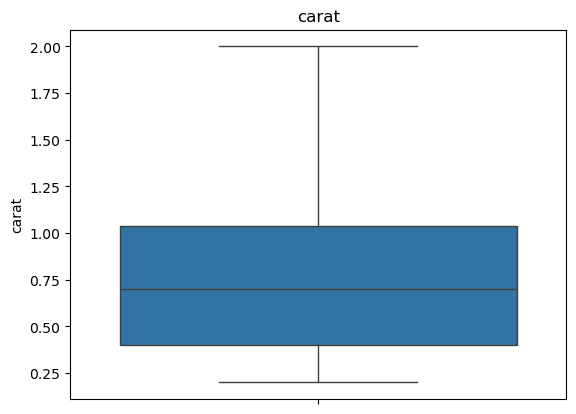

In [31]:
cart='carat'
for i in df.select_dtypes(include=np.number).columns:
    if i == cart:
        plt.title(i)
        sns.boxplot(df[i])
        plt.show()

<Axes: ylabel='clarity'>

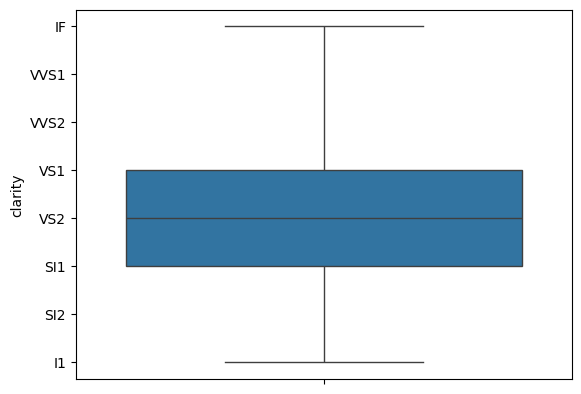

In [32]:
sns.boxplot(df['clarity'])

<Axes: ylabel='color'>

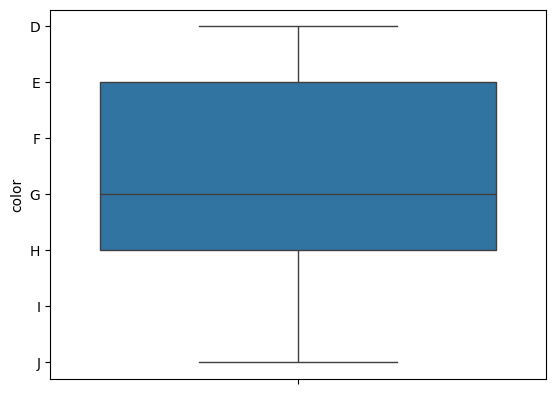

In [33]:
sns.boxplot(df['color'])

<Axes: ylabel='cut'>

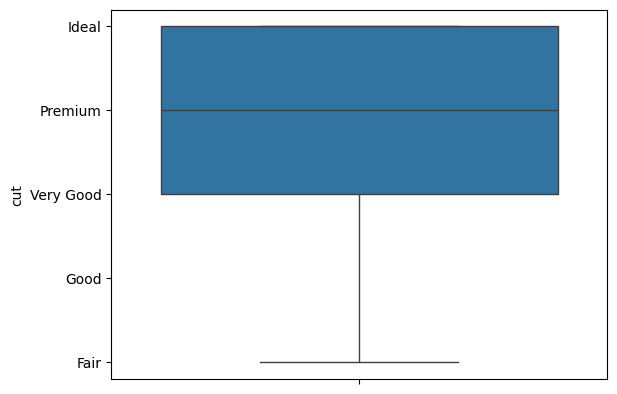

In [34]:
sns.boxplot(df['cut'])

<Axes: ylabel='depth'>

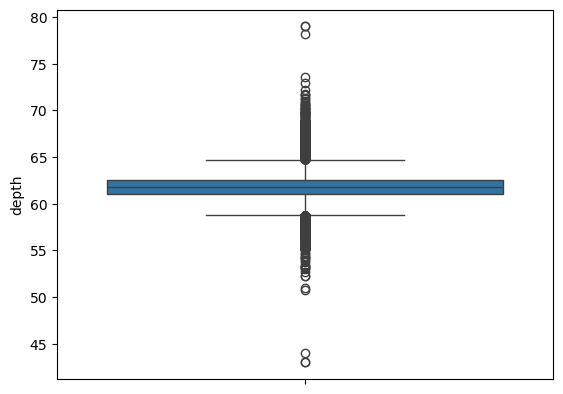

In [35]:
sns.boxplot(df['depth'])